In [129]:
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

In [130]:
ANNOT_SHUFF_ACTORS_PATH = "download_scripts/shuffled_facescrub_actors.txt"
ANNOT_ACTORS_PATH = "download_scripts/facescrub_actors.txt"
ANNOT_ACTRESS_PATH = "download_scripts/facescrub_actresses.txt"
DATA_ACTORS_PATH = "data/actor/"
DATA_ACTRESS_PATH = "data/actress/"

In [131]:
actors_frame = pd.read_csv(ACTORS_PATH, delimiter='\t')

In [132]:
actors_frame.head()

,name,image_id,face_id,url,bbox,sha256
0,Aaron Eckhart,1,1,http://upload.wikimedia.org/wikipedia/commons/...,"53,177,418,542",dec996994cf1eec33b53c203cff0e8f25638829fa2ad71...
1,Aaron Eckhart,2,2,http://movies.dosthana.com/sites/default/files...,"80,102,260,282",f84d0c3b1b854a51e6bc031bc353e801834e81df795e85...
2,Aaron Eckhart,3,3,http://upload.wikimedia.org/wikipedia/commons/...,"203,802,975,1574",8548658ef00f2ac4c384fbfff9d3ae225b4b9e0c2aa45e...
3,Aaron Eckhart,4,4,http://25.media.tumblr.com/nJ2vga5sae9o2ks4Flt...,"62,90,231,259",658d83f35859d2f313ff660c1900427c21eae1c41e3035...
4,Aaron Eckhart,5,5,http://upload.wikimedia.org/wikipedia/commons/...,"276,120,492,336",1fa14fed3371280e8785df42cdc5d0335e7923a38f1b06...


## bbox
The coordinates of the bounding box for a face in the image. The format is x1,y1,x2,y2, where (x1,y1) is the coordinate of the top-left corner of the bounding box and (x2,y2) is that of the bottom-right corner, with (0,0) as the top-left corner of the image.  Assuming the image is represented as a Python Numpy array I, a face in I can be obtained as I[y1:y2, x1:x2].

In [193]:
def show_full_and_crop(actor, img_id, face_id, bbox):
    img_name = actor + '_' + img_id + '.jpeg'
    img_face_name = actor + '_' + img_id + '_' + face_id + '.jpeg'
    
    img = io.imread(os.path.join(DATA_ACTORS_PATH, 'images', actor, img_name))
    face = io.imread(os.path.join(DATA_ACTORS_PATH, 'faces', actor, img_face_name))
    
    plt.figure()
    plt.subplot(121)
    plt.imshow(img)
    plt.gca().add_patch(matplotlib.patches.Rectangle((bbox[0], bbox[1]), bbox[2]-bbox[0], bbox[3]-bbox[1], ec='k', fc='none'))
    plt.subplot(122)
    plt.imshow(face)

In [194]:
def show_bounding_boxes(image, bbox):
    '''Show image with bounding boxes'''
    plt.imshow(image)
    plt.gca().add_patch(matplotlib.patches.Rectangle((bbox[0], bbox[1]), bbox[2]-bbox[0], bbox[3]-bbox[1], ec='k', fc='none'))

In [200]:
ind = np.random.randint(0, 100)
# ind = 0
actor = actors_frame.iloc[ind]['name']
img_id = actors_frame.iloc[ind]['image_id'].astype('str')
face_id = actors_frame.iloc[ind]['face_id'].astype('str')
bbox = actors_frame.iloc[ind]['bbox']
bbox = list(map(int, bbox.split(',')))
actor = actor.replace(' ', '_')
img_name = actor + '_' + img_id + '.jpeg'
img_name

'Aaron_Eckhart_64.jpeg'

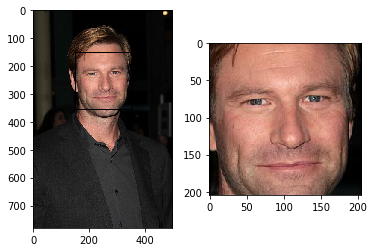

In [201]:
show_full_and_crop(actor, img_id, face_id, bbox)

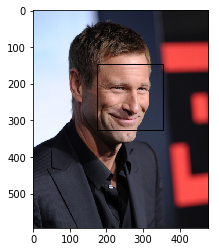

In [151]:
plt.figure()
show_bounding_boxes(io.imread(os.path.join(DATA_ACTORS_PATH, 'images', actor, img_name)), bbox)

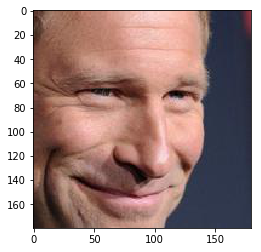

In [153]:
img_face_name = actor + '_' + img_id + '_' + face_id + '.jpeg'
plt.figure()
plt.imshow(io.imread(os.path.join(DATA_ACTORS_PATH, 'faces', actor, img_face_name)))